In [1]:
import torch # type: ignore
import torch.nn as nn # type: ignore
import numpy as np # type: ignore
from source import *

# Shape matching test

In [2]:
B, C, H, W = 10, 3, 64, 128  # Example input shape (B, C, H, W)
x = torch.randn(B, C, H, W)  # Randomly generate input data

# Create LinearDCT objects for DCT and IDCT in the height and width directions
linear_dct_h = LinearDCT(H, 'dct')
linear_dct_w = LinearDCT(W, 'dct')
linear_idct_h = LinearDCT(H, 'idct')
linear_idct_w = LinearDCT(W, 'idct')

# Apply 2D DCT transformation
dct_result = apply_linear_2d(x, linear_dct_h, linear_dct_w)
print("DCT Result Shape:", dct_result.shape)

# Apply 2D inverse DCT transformation
idct_result = apply_linear_2d(dct_result, linear_idct_h, linear_idct_w)
print("IDCT Result Shape:", idct_result.shape)


DCT Result Shape: torch.Size([10, 3, 64, 128])
IDCT Result Shape: torch.Size([10, 3, 64, 128])


In [3]:
show_x = x[0,0,:,:]

In [4]:
show_x

tensor([[ 1.5344e+00,  8.5418e-01,  8.9988e-01,  ..., -3.5362e-02,
          1.2142e-01, -4.1379e-01],
        [-2.2907e+00, -9.6795e-01, -1.4178e+00,  ..., -4.6147e-01,
         -5.2416e-01,  4.3912e-01],
        [-6.1661e-01,  1.2674e-01, -4.1144e-01,  ..., -9.0020e-01,
         -1.5487e+00,  6.4257e-01],
        ...,
        [ 1.8097e-04, -3.5283e-01, -9.1309e-01,  ...,  9.2690e-01,
          6.3184e-01, -2.2625e+00],
        [-1.1250e+00,  8.4068e-01,  3.9754e-01,  ...,  2.2014e-01,
         -3.9615e-02,  5.8144e-01],
        [-8.1586e-01, -5.5686e-02,  1.4406e+00,  ..., -1.1703e-02,
         -1.1990e+00,  1.0037e+00]])

In [5]:
show_idct = idct_result[0,0,:,:]

In [6]:
show_idct

tensor([[ 1.5344e+00,  8.5418e-01,  8.9988e-01,  ..., -3.5362e-02,
          1.2142e-01, -4.1379e-01],
        [-2.2907e+00, -9.6795e-01, -1.4178e+00,  ..., -4.6147e-01,
         -5.2416e-01,  4.3912e-01],
        [-6.1661e-01,  1.2674e-01, -4.1144e-01,  ..., -9.0020e-01,
         -1.5487e+00,  6.4257e-01],
        ...,
        [ 1.8081e-04, -3.5283e-01, -9.1309e-01,  ...,  9.2690e-01,
          6.3184e-01, -2.2625e+00],
        [-1.1250e+00,  8.4068e-01,  3.9754e-01,  ...,  2.2014e-01,
         -3.9615e-02,  5.8144e-01],
        [-8.1586e-01, -5.5686e-02,  1.4406e+00,  ..., -1.1703e-02,
         -1.1990e+00,  1.0037e+00]])

# tests on the weather field

In [12]:
q = np.load("/home/shepherdchinacan/era5-infinity-diffusion/process_era5_data_before/specific_humidity_1973_2017.npy") / 0.01

In [18]:
q.max()

0.9157713

In [13]:
q.shape

(65744, 240, 121)

In [14]:
q_sample = q[1000]

In [15]:
q_sample.shape

(240, 121)

In [19]:
q_sample

array([[0.01365234, 0.0099323 , 0.00514643, ..., 0.02730633, 0.02587768,
        0.02218904],
       [0.01364387, 0.00988886, 0.00518761, ..., 0.02769997, 0.02609499,
        0.02224182],
       [0.01363817, 0.00984327, 0.00522732, ..., 0.0281007 , 0.02631666,
        0.02228925],
       ...,
       [0.01364869, 0.01010852, 0.00504851, ..., 0.02619611, 0.02522688,
        0.02205819],
       [0.01364749, 0.01003676, 0.00507727, ..., 0.02655804, 0.02545315,
        0.02209975],
       [0.01365114, 0.00997839, 0.00510965, ..., 0.026931  , 0.02567164,
        0.02214243]], dtype=float32)

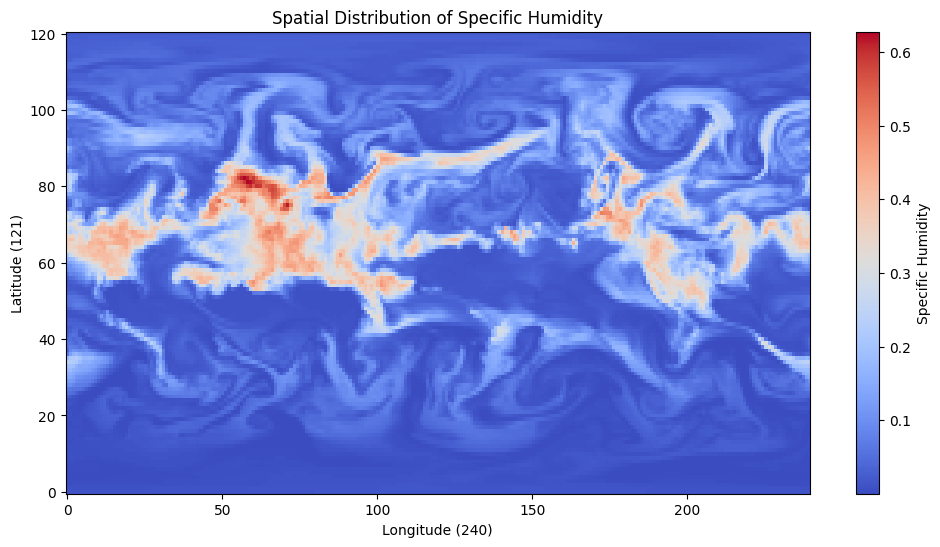

In [20]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

# Create the plot
plt.figure(figsize=(12, 6))
plt.imshow(q_sample.T, cmap='coolwarm', origin='lower', aspect='auto')
plt.colorbar(label='Specific Humidity')
plt.title('Spatial Distribution of Specific Humidity')
plt.xlabel('Longitude (240)')
plt.ylabel('Latitude (121)')
plt.show()

In [22]:
import torch # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore


q_sample_tensor = torch.tensor(q_sample, dtype=torch.float32)

# Create LinearDCT objects for DCT and IDCT transformations
linear_dct_h = LinearDCT(240, 'dct')
linear_dct_w = LinearDCT(121, 'dct')
linear_idct_h = LinearDCT(240, 'idct')
linear_idct_w = LinearDCT(121, 'idct')

# Apply 2D DCT transform
dct_result = apply_linear_2d(q_sample_tensor.unsqueeze(0).unsqueeze(0), linear_dct_h, linear_dct_w)

# Apply 2D inverse DCT transform
idct_result = apply_linear_2d(dct_result, linear_idct_h, linear_idct_w)
idct_result = idct_result.squeeze(0).squeeze(0).numpy()


In [23]:
dct_result.shape

torch.Size([1, 1, 240, 121])

In [24]:
idct_result.shape

(240, 121)

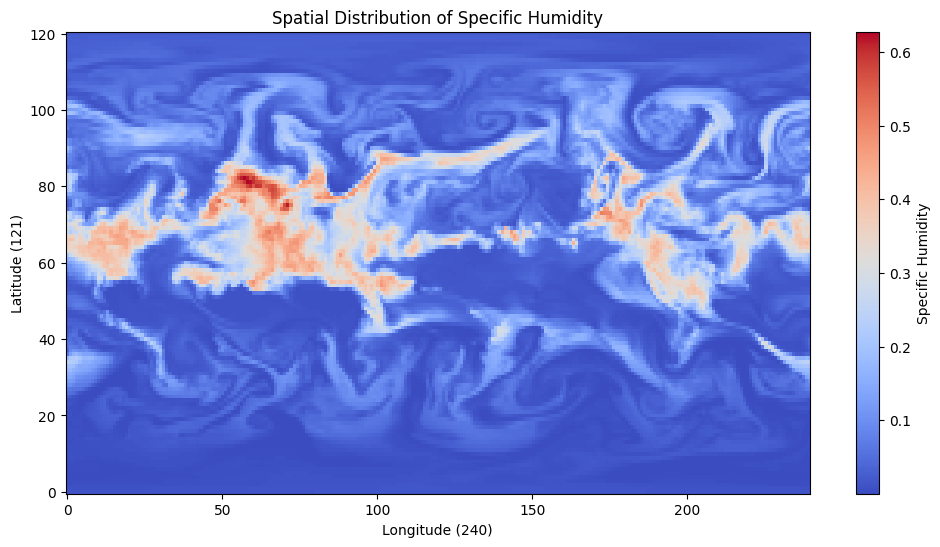

In [25]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

# Create the plot
plt.figure(figsize=(12, 6))
plt.imshow(idct_result.T, cmap='coolwarm', origin='lower', aspect='auto')
plt.colorbar(label='Specific Humidity')
plt.title('Spatial Distribution of Specific Humidity')
plt.xlabel('Longitude (240)')
plt.ylabel('Latitude (121)')
plt.show()